<a href="https://colab.research.google.com/github/ClarisseAlvarenga/alura_experimentos/blob/master/Experimentos_Alura_Clarisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução à análise de experimentos**



## **Importando as bibliotecas**

In [1]:
#Pandas
import pandas as pd
#Numpy
import numpy as np


## **Ensaios realizados na forma normalizada**



<center>
<img width='800px' src="https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_2.png?raw=true"> </center>

Construindo uma matriz representando todos os ensaios realizados

In [2]:
#usando o numpy
ensaios = np.array([[-1,-1], [1,-1], [-1,1], [1,1]])

pyDOE2


https://pypi.org/project/pyDOE2/

In [3]:
!pip install pyDOE2

  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-cp36-none-any.whl size=25519 sha256=7452c7b460082a1e2e3317fa59cc79907b5ae525cc14c45c1eb92c15a57a1ecd
  Stored in directory: /root/.cache/pip/wheels/60/88/1d/b334ee00dd83e82d111ec56c3be91573d335c93870698037f1
Successfully built pyDOE2


In [4]:
import pyDOE2 as doe

Criando um planejamento fatorial de $2^2$ usando o pyDOE2

In [5]:
#2 level full factorial design
ensaios = doe.ff2n(2)

In [6]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

Inserindo o planejamento num DataFrame

In [7]:
experimento = pd.DataFrame(ensaios, columns = ['Farinha', 'Chocolate'])
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


In [8]:
experimento['Porcoes'] = [19,37,24,49]

In [9]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


## **Analisando graficamente o experimento**

In [10]:
#usando o Seaborn
import seaborn as sns

In [11]:
#escolhendo a paleta de cores e o estilo do gráfico
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('terrain')
# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')


**Para a farinha**

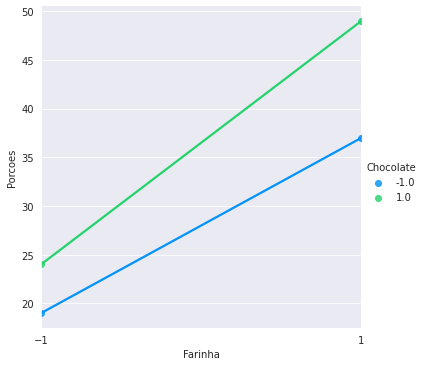

In [12]:
ax1 = sns.lmplot(data= experimento, x='Farinha', y='Porcoes', ci=None, hue='Chocolate')
#ci = intervalo de confiança
#hue divide a linha em duas de acordo com o Chocolate, para verificar o efeito da interação com a farinha
#definindo um parâmetro para excluir os valores intermediários
ax1.set(xticks = (-1,1));

**Para o chocolate**

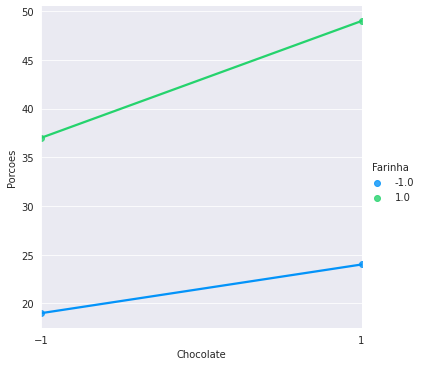

In [13]:
#valores separados em dois grupos pela variável Farinha
ax2 = sns.lmplot(data= experimento, x='Chocolate', y='Porcoes', ci=None, hue='Farinha')
ax2.set(xticks = (-1,1));

**Visualizando os dois gráficos em conjunto**

In [14]:
#função copiada do stackoverflow - https://stackoverflow.com/questions/33049884/how-to-plot-2-seaborn-lmplots-side-by-side
def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    from matplotlib.cm import get_cmap
    
    regplots = []
    
    levels = data[hue].unique()
    
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs
            )
        )
    
    return regplots

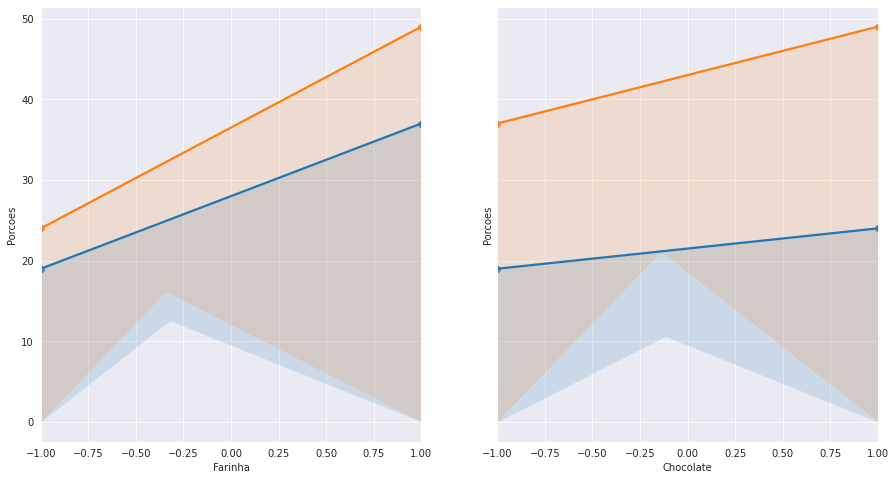

In [15]:
# Visualizando lado a lado Two subplots
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,8))
#passando os parâmetros dos nossos gráficos para a função
hue_regplot(data= experimento, x='Chocolate', y='Porcoes',hue='Farinha', ax=ax2)
hue_regplot(data=experimento, x='Farinha', y='Porcoes', hue='Chocolate', ax=ax1)
plt.show()

## **Análise Estatística**

<img src="https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_3.png?raw=true">

### **Ajustando o modelo estatístico**

In [16]:
#usando o statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
#formula: buscamos as porções, pela Farinha, Chocolate e a interação Farinha Chocolate (o intercepto é gerado pela função) - a fórmula parece muito com a sintaxe de modelos do R
modelo = smf.ols(data=experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [18]:
#ajustando os parâmetros do modelo
modelo_ajustado = modelo.fit()

In [19]:
#vendo os resultados que o método de ajuste encontrou
print(modelo_ajustado.summary())
#intercept é a média da quantidade de porções nos experimentos realizados

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                nan
Time:                        00:40:25   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: invalid value encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-

### **Análise de significância estatística**

<center>
<img src='https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_4.png?raw=true'> </center>

## **Aumentando os Graus de Liberdade do Modelo**

<img src="https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_5.png?raw=true">

In [20]:
#aumentando o número de ensaios - no centro da área de experimentação. E repetidos no mesmo ponto
#para que possamos avaliar a precisão do experimento
#inserindo os novos dados no dataframe
centro = np.array([[0,0,29],
                   [0,0,30],
                   [0,0,29],
                   [0,0,30]])

In [21]:
centro_df = pd.DataFrame(centro, columns=['Farinha', 'Chocolate', 'Porcoes'], index=[4,5,6,7])

In [22]:
centro_df

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [23]:
#união de dataframes
experimento = experimento.append(centro_df)

In [24]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


## **Análise de Significância Estatística**

In [25]:
modelop = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [26]:
modelo_ajustado = modelop.fit()

In [27]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Mon, 05 Oct 2020   Prob (F-statistic):            0.00152
Time:                        00:57:45   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<center>
  <img src="https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_6.png?raw=true">
</center>


<center>
<img src="https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_7.png?raw=true"> </center>

<center>
<img src="https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_10.png?raw=true">
</center>


<center><img src="https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_8.png?raw=true"> </center>

<center><img src="https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_11.png?raw=true">


### Gráfico padronizado de Pareto
<center>
  <img src="https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_20.png?raw=true">
</center>

In [28]:
#pegando os valores de t do modelo 
t_valores = modelo_ajustado.tvalues

In [29]:
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [30]:
nome = t_valores.index.tolist()

In [31]:
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

In [38]:
#inserir uma linha com o t tabelado
from scipy import stats

In [39]:
distribuicao = stats.t(df = 4)

In [40]:
#computa a probabilidade de T 
distribuicao.ppf(q = 1 - 0.025)

2.7764451051977987

In [41]:
limite = [distribuicao.ppf(q=1-0.025)]*len(nome)

In [42]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### **Plotando o gráfico**

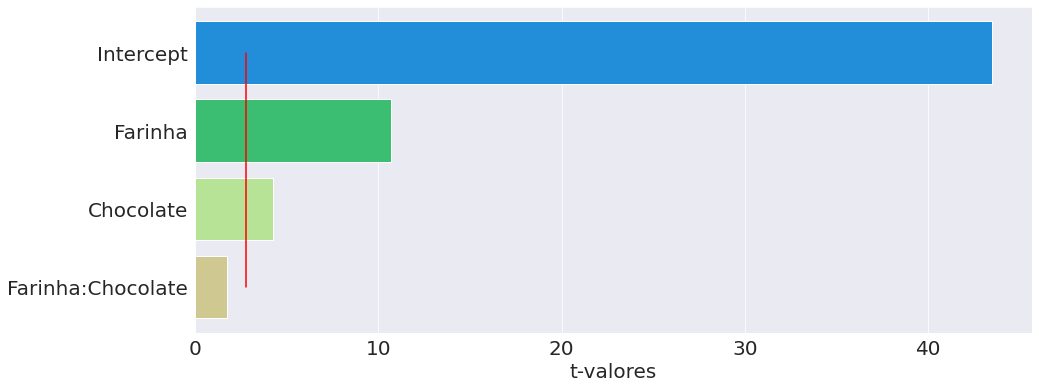

In [45]:
pareto = sns.barplot(x=t_valores, y=nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t-valores', fontsize=20)
#incluindo o limite do t tabelado - se a coluna for maior que o limite a variável é estatisticamente significativa
pareto.plot(limite, nome,'r');


## **Propondo um novo modelo estatístico**

<center>
  <img src="https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_9.png?raw=true">
</center>

In [48]:
modelo_2 = smf.ols(data=experimento, formula='Porcoes ~ Farinha + Chocolate')

In [49]:
modelo_ajustado_2 = modelo_2.fit()

In [50]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           0.000571
Time:                        01:28:50   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


## **Gráfico padronizado de Pareto no novo modelo**

In [52]:
t_valores = modelo_ajustado_2.tvalues

In [53]:
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [54]:
nome = t_valores.index.tolist()

In [55]:
nome

['Intercept', 'Farinha', 'Chocolate']

In [56]:
#criando a distribuição
distribuicao = stats.t(df = 5)

In [57]:
limite = [distribuicao.ppf(q=1-0.025)]*len(nome)
limite

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

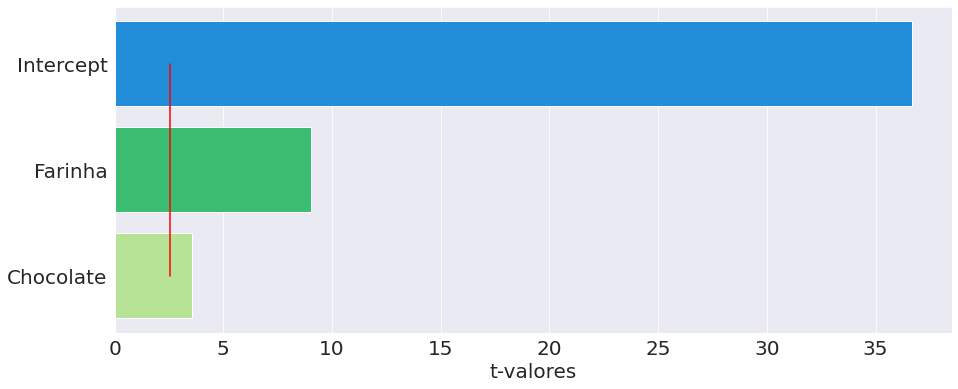

In [58]:
pareto = sns.barplot(x=t_valores, y=nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t-valores', fontsize=20)
#incluindo o limite do t tabelado - se a coluna for maior que o limite a variável é estatisticamente significativa
pareto.plot(limite, nome,'r');

##**Preditos por observados**

In [59]:
observados = experimento['Porcoes']

In [60]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

In [61]:
preditos = modelo_ajustado_2.predict()

In [62]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

In [63]:
import matplotlib.pyplot as plt


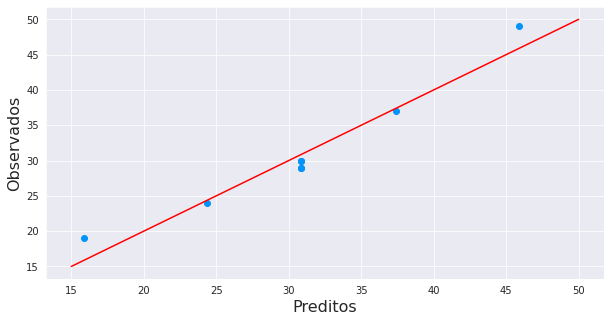

In [72]:
plt.figure(figsize=(10,5))
plt.xlabel('Preditos', fontsize=16)
plt.ylabel('Observados', fontsize=16)
#incluindo a linha ideal de dados
x = np.linspace(start = 15, stop=50, num=10)
y = np.linspace(start = 15, stop=50, num=10)
plt.plot(x,y, 'r');
plt.scatter(preditos, observados);

In [73]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           0.000571
Time:                        01:55:04   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


## **Explorando o modelo**

<center>
  <img src="https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_22.png?raw=true">
</center>

In [74]:
parametros = modelo_ajustado_2.params

In [75]:
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

In [84]:
#definindo uma função para a Bel usar
def modelo_receita(x_f, x_c):
  #normalizando os valores passados pela cliente
  #Limites
  limite_normalizado = [-1,1]
  limite_farinha = [0.5,1.5]
  limite_chocolate = [0.1,0.5]
  #conversão (faz uma interpolação)
  x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado)
  x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado)

  #construir o modelo
  porcoes = parametros['Intercept'] + parametros['Farinha']*x_f_convertido + parametros['Chocolate']*x_c_convertido
  return round(porcoes)

In [86]:
#esta função recebe os valores reais em kilogramas passados pel
modelo_receita(0.5,0.1)

16.0

### Diferenças entre leis estatísticas e leis matemáticas

<center>
  <img src = "https://github.com/ClarisseAlvarenga/alura_experimentos/blob/master/figuras/Figura_21.png?raw=true">
</center>

In [89]:
x_farinha = np.linspace(start=0.5, stop=1.5, num=10)
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [90]:
x_chocolate = np.linspace(start=0.1, stop=0.5, num=10)
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

In [91]:
#usando a função criada para mostrar o modelo atuando em vários pontos do experimento
pontos = []
for cont1 in x_farinha:
  temp = []
  for cont2 in x_chocolate:
    temp.append(modelo_receita(cont1,cont2))
  pontos.append(temp)
    

In [92]:
#visualizando minhas predições
pontos

[[16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 22.0, 23.0, 24.0],
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0],
 [21.0, 22.0, 23.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0],
 [23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0],
 [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0],
 [28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 33.0, 34.0, 35.0, 36.0],
 [30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0],
 [33.0, 34.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0],
 [35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 43.0],
 [37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0]]

## **Construindo a superfície da resposta**

In [93]:
#importando a paleta de cores do matplotlib
import matplotlib.cm as cm

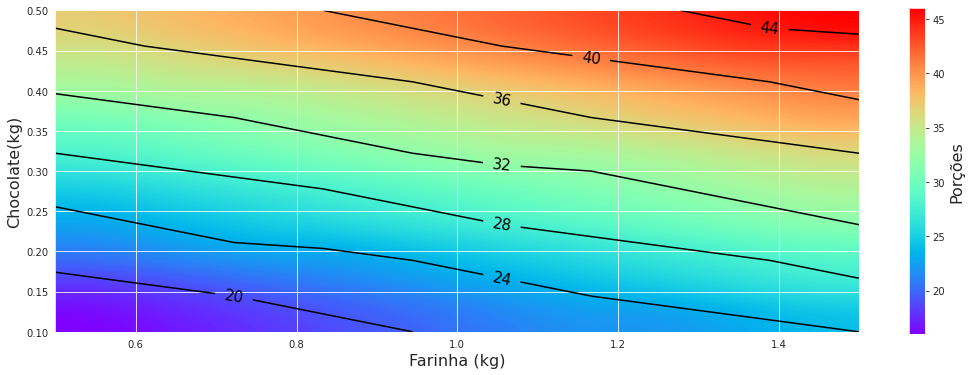

In [107]:
#construindo nosso gráfico de cores
#base
plt.figure(figsize=(18,6))
#nomeando os eixos
plt.xlabel('Farinha (kg)', fontsize=16)
plt.ylabel('Chocolate(kg)', fontsize=(16))
#construindo o mapa de cores, o lower  inverte a matriz de valores, usando interpolação quádrica e 
#os limites (extent), são os limites de nossas variáveis na ordem x (min, max)e y(min, max)
mapa_cor = plt.imshow(pontos,origin='lower',cmap=cm.rainbow, interpolation='quadric',extent=(0.5,1.5,0.1,0.5))
#incluindo uma barra de cor
plt.colorbar().set_label('Porções', fontsize=16)
#INCLUINDO ISOLINHAS
#incluindo linhas com os dados usados na previsão e as previsões, na cor preta e com espessura de linha de 1,5
linhas = plt.contour(x_farinha, x_chocolate, pontos,colors='k', linewidths=1.5) #estas linhas representam as regiões onde a quantidade de cupcakes é igual
#incluindo valores nas linhas, dentro das linhas com espaçamento de 10 e valores arredondados
plt.clabel(linhas,inline=True, fontsize=15, inline_spacing=10, fmt='%1.0f');
